In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Each column in the data represents:
PassengerId: Passenger Identity
Survived: Whether passenger survived or not 
Pclass: Class of ticket
Name: Name of passenger 
Sex: Sex of passenger (Male or Female) 
Age: Age of passenger 
SibSp: Number of sibling and/or spouse travelling with passenger
Parch: Number of parent and/or children travelling with passenger 
Ticket: Ticket number 
Fare: Price of ticket 
Cabin: Cabin number

In [26]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')

In [27]:
df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


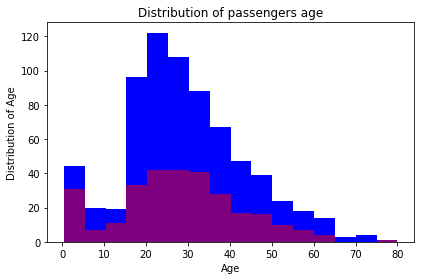

In [38]:
num_bins = 16
plt.hist(df['Age'],num_bins,color = 'blue')
plt.hist(df[df['Survived'] == 1]['Age'],num_bins,color = 'red',alpha=.5)
plt.xlabel('Age')
plt.ylabel('Distribution of Age')
plt.title('Distribution of passengers age')
plt.tight_layout()
plt.show()

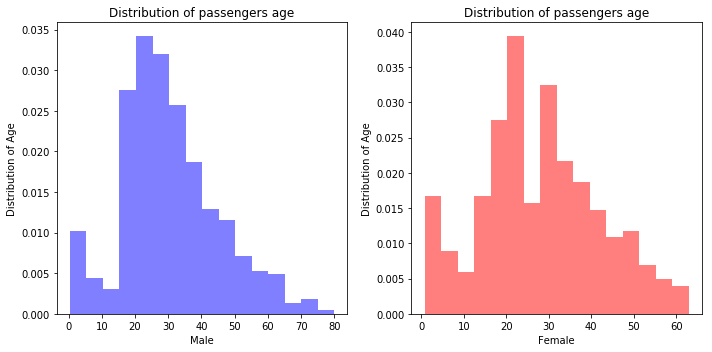

In [21]:
plt.figure(figsize = (10,5))

num_bins = 16
plt.subplot(1,2,1)
plt.hist(df.loc[df['Sex']=='male']['Age'],num_bins,density = True,color = 'blue',alpha=.5)
plt.xlabel('Male')
plt.ylabel('Distribution of Age')
plt.title('Distribution of passengers age')

plt.subplot(1,2,2)
plt.hist(df.loc[df['Sex']=='female']['Age'],num_bins,density = True,color = 'red',alpha=.5)
plt.xlabel('Female')
plt.ylabel('Distribution of Age')
plt.title('Distribution of passengers age')
plt.tight_layout()
plt.show()

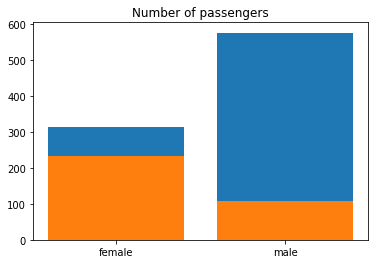

In [35]:
sex, counts = np.unique(df['Sex'],return_counts = True)
sex,survive_counts = np.unique(df[df['Survived'] == 1]['Sex'], return_counts = True)
plt.bar(sex,counts)
plt.bar(sex,survive_counts)
plt.title('Number of passengers')
plt.show()

I wonder the distribution of gender in passengers and what is the age distribution in the passengers and if there is any differences between male and female. The histogram above shows that a large percent of the passengers are between 15 to 35 both for male and female and the age distribution of survived passengers follow the similar pattern.The bar plot tells the number of male passengers is almost twice as the female passengers. But survived female passengers are almost twice as male passengers. 

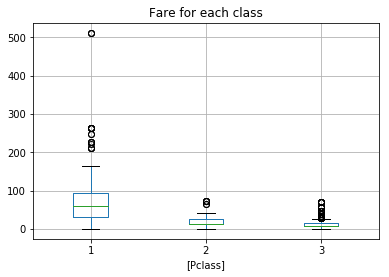

In [58]:
df.boxplot(column=['Fare'], by=['Pclass'])
plt.title('Fare for each class')
plt.suptitle('') 
plt.show()

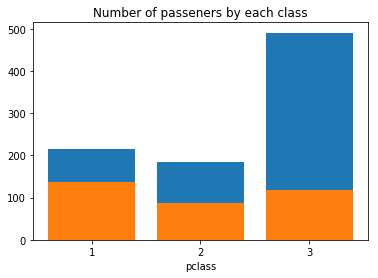

In [59]:
pclass, counts = np.unique(df['Pclass'],return_counts = True)
pclass, survive_counts = np.unique(df[df['Survived'] ==1]['Pclass'], return_counts = True)
plt.bar(pclass,counts)
plt.bar(pclass,survive_counts)
plt.xlabel('pclass')
loc = [1,2,3]
xtick = ['1','2','3']
plt.xticks(loc,xtick)
plt.title('Number of passeners by each class')
plt.show()

The fare for class 1 is much higher than the other 2 classes. Class 3 has the most passengers and class 1 has the most survivors.

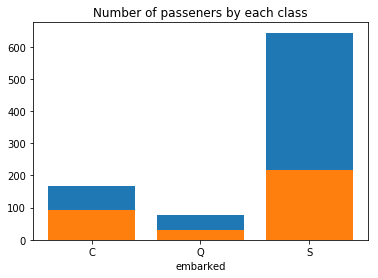

In [91]:
embarked, counts = np.unique(df['Embarked'].dropna(),return_counts = True)
embarked, survive_counts = np.unique(df[df['Survived'] ==1]['Embarked'].dropna(), return_counts = True)
plt.bar(embarked, counts)
plt.bar(embarked, survive_counts)
plt.xlabel('embarked')
loc = np.arange(len(embarked))
xtick = embarked
plt.xticks(loc,xtick)
plt.title('Number of passeners by each class')
plt.show()

There are more passengers boarded from S and also more passengers survived.  